### **Analisando os Preços de Aluguel nos EUA**

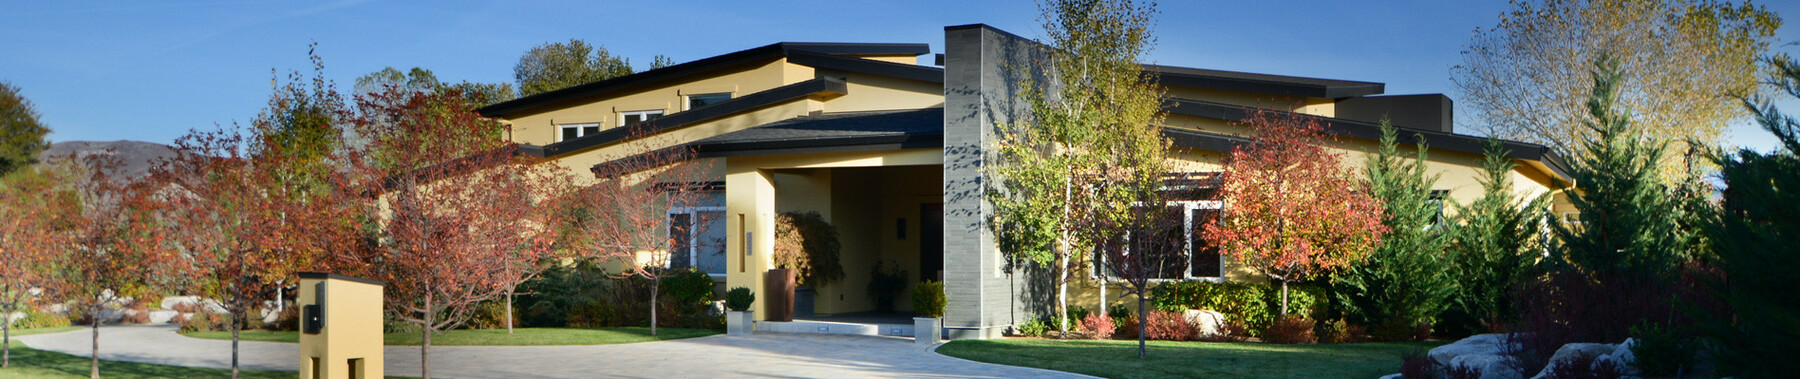

O Craigslist, com sua vasta base de dados de anúncios de imóveis vendidos entre particulares, oferece um recurso inestimável para pesquisadores e analistas do mercado imobiliário. Ao analisar os preços, as características dos imóveis e as tendências de localização presentes nos anúncios, é possível identificar padrões e dinâmicas regionais que podem não ser capturados por dados oficiais.

A base de dados contem os seguintes campos :


* id: ID do anúncio                              
* url: URL do anúncio                            
* region: Região do Craigslist                         
* region_url: URL da região                    
* price: Aluguel por mês                         
* type: Apartamento ou casa                        
* sqfeet: Metragem quadrada total                        
* beds: Número de quartos                           
* baths: Número de banheiros                          
* cats_allowed: Gatos permitidos
* dogs_allowed: Cães permitidos                  
* smoking_allowed: Permitido fumar              
* wheelchair_access: Tem acesso para cadeira de rodas           
* electric_vehicle_charge:  Tem carregador de veículo elétrico       
* comes_furnished: Vem com móveis                
* laundry_options: Opções de lavanderia disponíveis           
* parking_options: Opções de estacionamento disponíveis          
* image_url: URL da imagem                   
* description: Descrição por Poster                   
* lat: Latitude                        
* long:  Longitude
* state :  Estado                  







In [ ]:
# Importa a biblioteca Pandas, fundamental para manipulação e análise de dados
import pandas as pd
# Importa as bibliotecas para visualização de dados: Seaborn e Matplotlib.
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Lê o arquivo CSV com os dados da pesquisa de moradia e armazena em um DataFrame
df = pd.read_csv('housing.csv')

In [ ]:
# Exibe as 5 primeiras linhas do DataFrame.
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [ ]:
# Exibe as 5 últimas linhas do DataFrame.
df.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca
384976,7049050010,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca


In [ ]:
# Exibe a quantidade de linhas e colunas respectivamente
df.shape

(384977, 22)

##**Exploration Data Analisys**

In [ ]:
# Exibe um resumo informativo do DataFrame, como tipos de dados e número de valores não-nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [ ]:
# Exibe estatísticas descritivas básicas das colunas numéricas do DataFrame.
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Aqui já podemos perceber possíveis outliers em certas colunas, como em beds e baths.

In [ ]:
# Conta o número de valores nulos em cada coluna do DataFrame.
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
type,0
sqfeet,0
beds,0
baths,0
cats_allowed,0


###**Análise das variaveis categoricas**

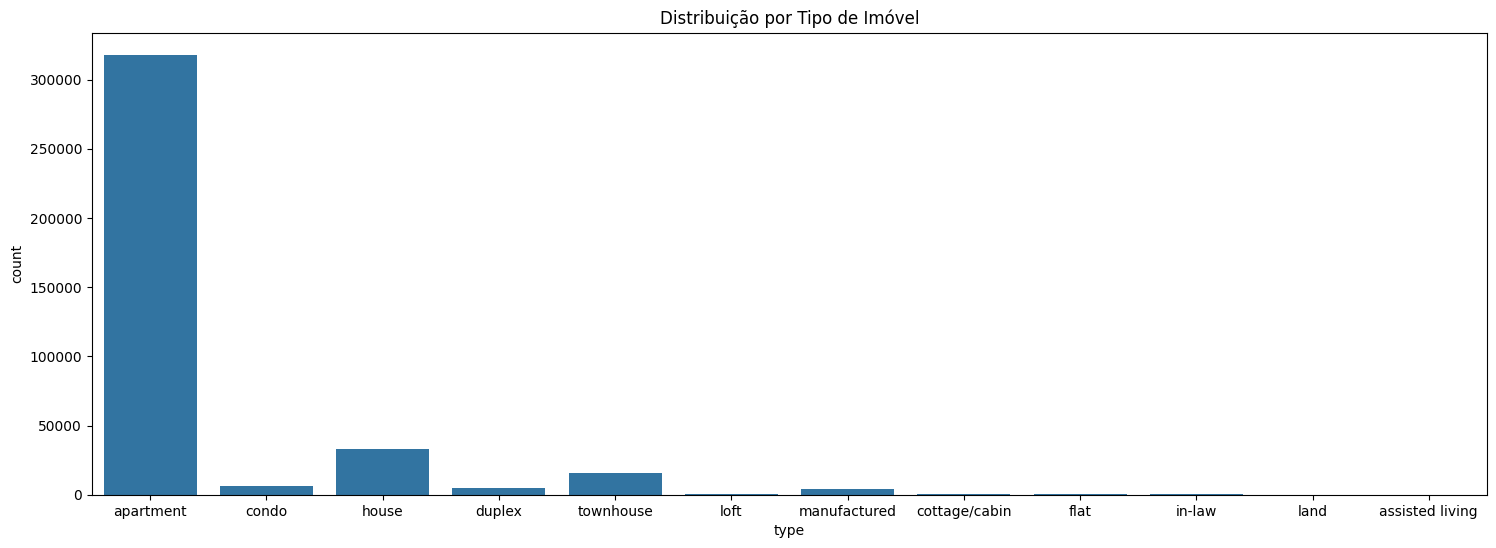

In [ ]:
# Grafico a frequência de cada tipo de imóvel (apartamento, casa, etc.) no DataFrame
plt.figure(figsize=(18, 6))
sns.countplot(x=df['type'])
plt.title("Distribuição por Tipo de Imóvel")
plt.show()

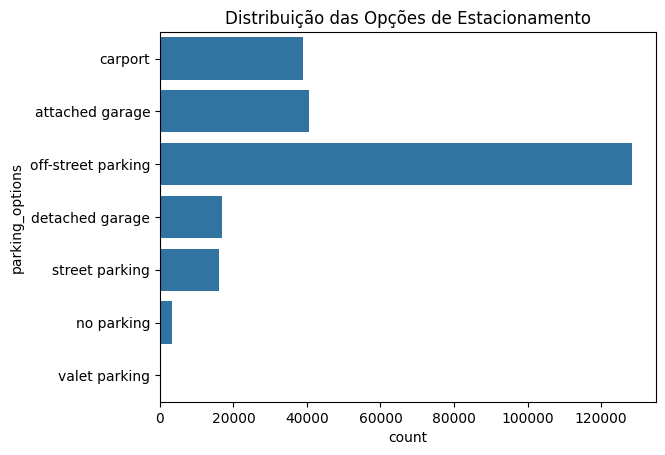

In [ ]:
# Grafico da frequência de cada opção de estacionamento disponível
sns.countplot(y=df['parking_options'])
plt.title("Distribuição das Opções de Estacionamento")
plt.show()

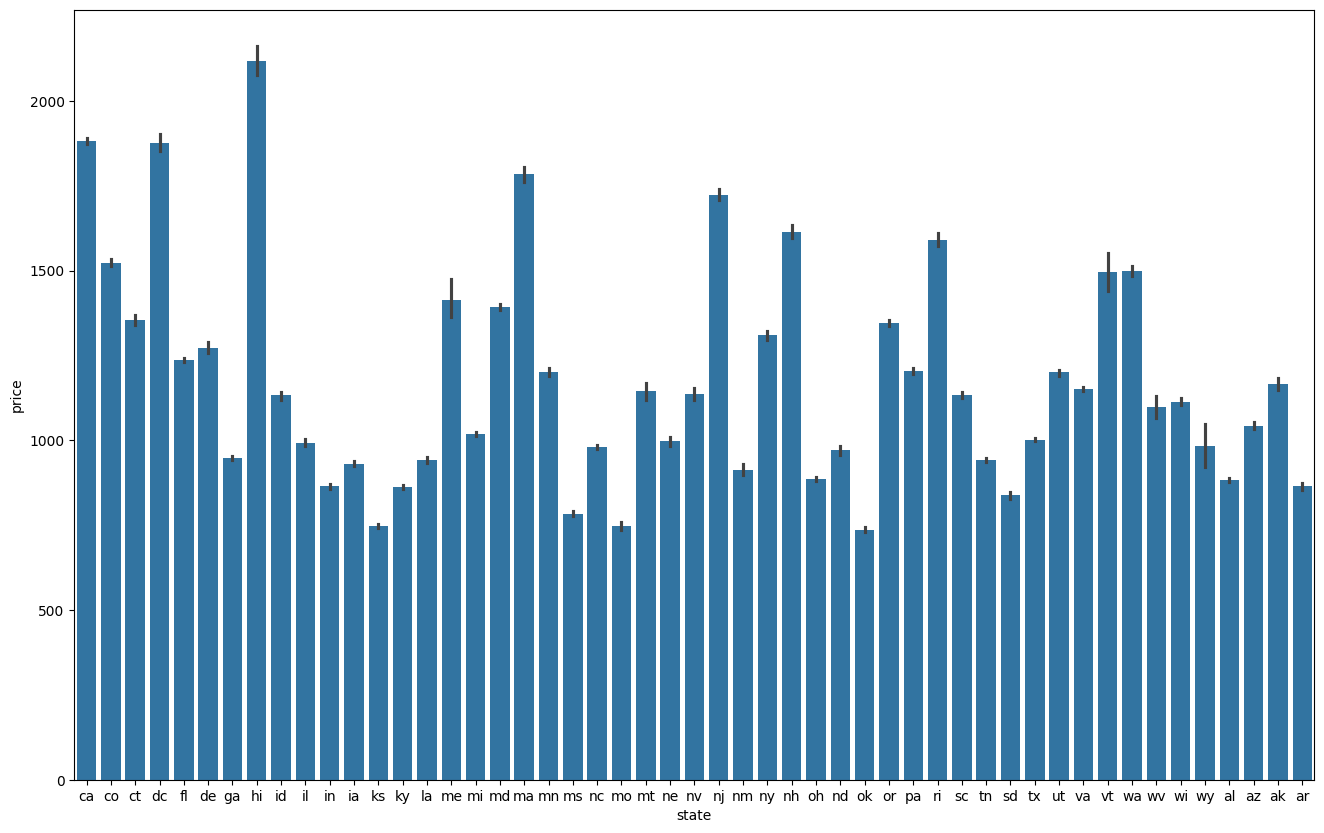

In [ ]:
# Cria um gráfico de barras mostrando a relação entre o estado e o preço dos imóveis.
plt.figure(figsize=(16, 10))
sns.barplot(data=df[(df['beds'] < 9) & (df['price'] < 10000)], y='price', x='state')
plt.show()

Podemos observar pelo gráfico que o top 5 Estados mais caros são:



1. HI - Havaí
2. CA - Califórnia
3. DC - Washington
4. MA - Massachusetts
5. NJ - Nova Jersey

In [ ]:
# Conta o número de estados diferentes representados na base de dados.
df['state'].value_counts().count()

51

### Análise das Variaveis Numericas

In [ ]:
# Conta a frequência de cada número de camas (beds) em imóveis.
df['beds'].value_counts()

,count
beds,
2,175513
1,117226
3,67037
4,11575
0,10978
5,2324
6,240
7,49
8,31


Acima de 8 camas os valores se tornam inconsistentes.

In [ ]:
df['price'].value_counts()

,count
price,
750,4207
850,3998
800,3993
1200,3828
950,3619
...,...
4115,1
409000,1
13900,1


In [ ]:
# Exibe o maior valor da coluna 'price'.
df['price'].max()

2768307249

O preço dos aluguéis também contém muitos outliers.

### **Mapeamento Geoespacial**
Mapa de Calor de Preços por Latitude e Longitude

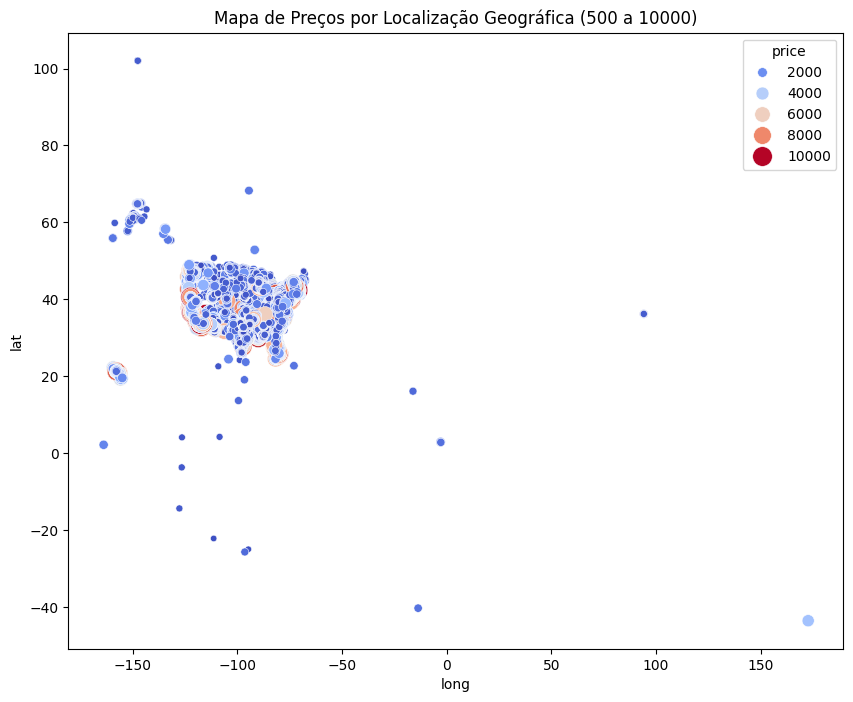

In [ ]:
# Filtra os dados para incluir apenas imóveis com preço entre 500 e 2000
df_filtered = df[(df['price'] >= 500) & (df['price'] <= 10000)]

# Gera o gráfico de dispersão geoespacial com os preços filtrados
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_filtered, x='long', y='lat', hue='price', palette='coolwarm', size='price', sizes=(20, 200))
plt.title("Mapa de Preços por Localização Geográfica (500 a 10000)")
plt.show()

### **Análise de Imóveis Permitindo Animais**
Preço Médio de Imóveis que Permitem Cães e Gatos

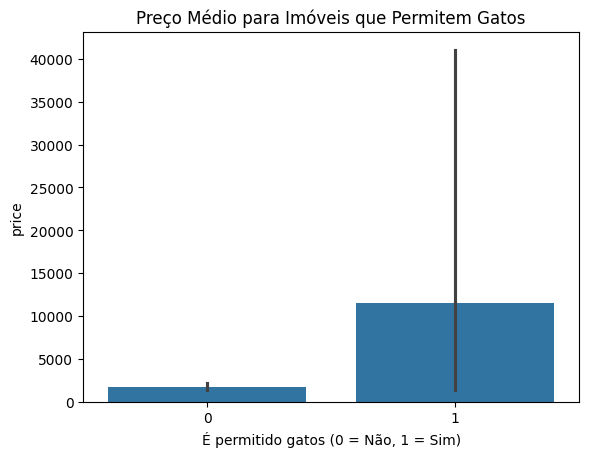

In [ ]:
# Comparar o preço médio entre imóveis que permitem ou não gatos.
# 0 é igual a não
# 1 é igual a sim
sns.barplot(data=df, x='cats_allowed', y='price')
plt.title("Preço Médio para Imóveis que Permitem Gatos")
plt.xlabel("É permitido gatos (0 = Não, 1 = Sim)")
plt.show()

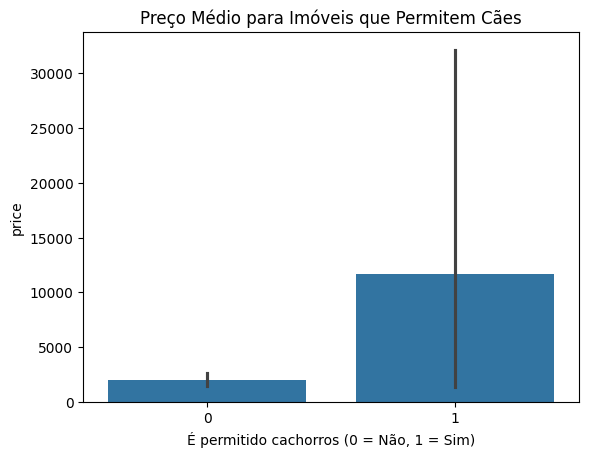

In [ ]:
# Comparar o preço médio entre imóveis que permitem ou não cachorros.
sns.barplot(data=df, x='dogs_allowed', y='price')
plt.title("Preço Médio para Imóveis que Permitem Cães")
plt.xlabel("É permitido cachorros (0 = Não, 1 = Sim)")
plt.show()

### Análise Acessibilidade e Conveniências
Preço Médio por Acessibilidade para Cadeiras de Rodas e Carregadores Elétricos

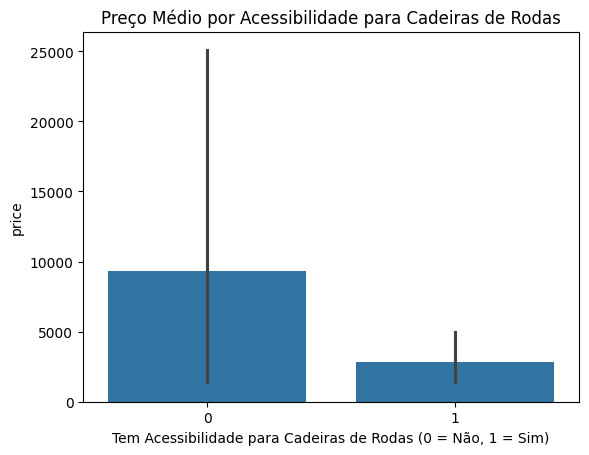

In [ ]:
#Comparar o preço médio de imóveis que têm acessibilidade para cadeiras de rodas.
sns.barplot(data=df, x='wheelchair_access', y='price')
plt.title("Preço Médio por Acessibilidade para Cadeiras de Rodas")
plt.xlabel("Tem Acessibilidade para Cadeiras de Rodas (0 = Não, 1 = Sim)")
plt.show()

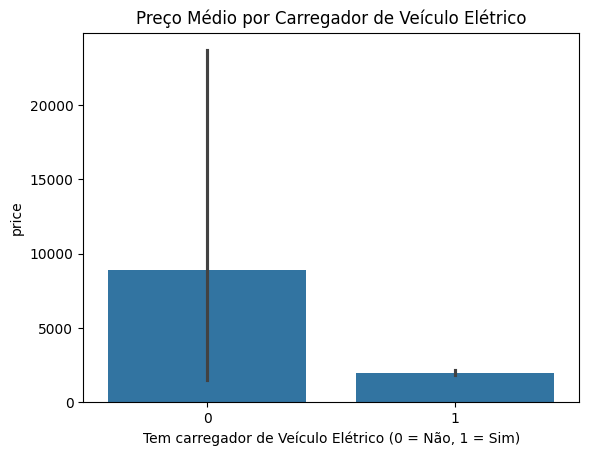

In [ ]:
#Comparar o preço médio de imóveis que têm carregadores para veículos elétricos.
sns.barplot(data=df, x='electric_vehicle_charge', y='price')
plt.title("Preço Médio por Carregador de Veículo Elétrico")
plt.xlabel("Tem carregador de Veículo Elétrico (0 = Não, 1 = Sim)")
plt.show()


### Analise de Permissão para Fumar e Preço

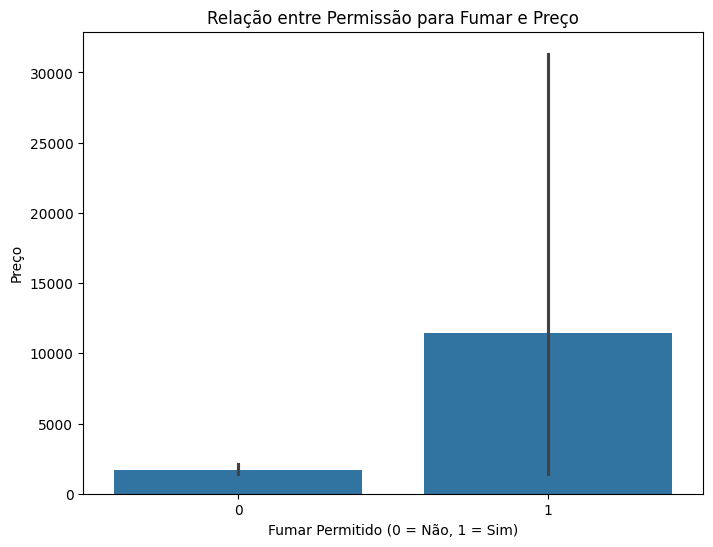

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoking_allowed', y='price')
plt.title("Relação entre Permissão para Fumar e Preço")
plt.xlabel("Fumar Permitido (0 = Não, 1 = Sim)")
plt.ylabel("Preço")
plt.show()


### Análise de numero de banheiro e quartos em relação ao preço
Preço dos imóveis em relação a quantidade de banheiros e quartos

In [ ]:
# Converte a coluna 'baths' para o tipo inteiro.
df['baths'] = df['baths'].astype(int)

<Figure size 800x600 with 0 Axes>

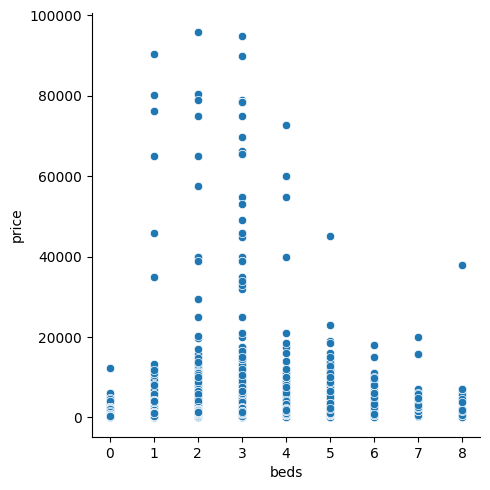

In [ ]:
# Cria um gráfico de dispersão entre o número de camas e o preço dos imóveis,
# para imóveis com menos de 9 camas e preço inferior a 100000.
plt.figure(figsize=(8, 6))
sns.relplot(data=df[(df['beds'] < 9) & (df['price'] < 100000)], y='price', x='beds')
plt.show()

In [ ]:
df['baths'].value_counts()

,count
baths,
1,225547
2,147811
3,6556
0,3107
4,1726
5,188
6,30
7,6
8,2


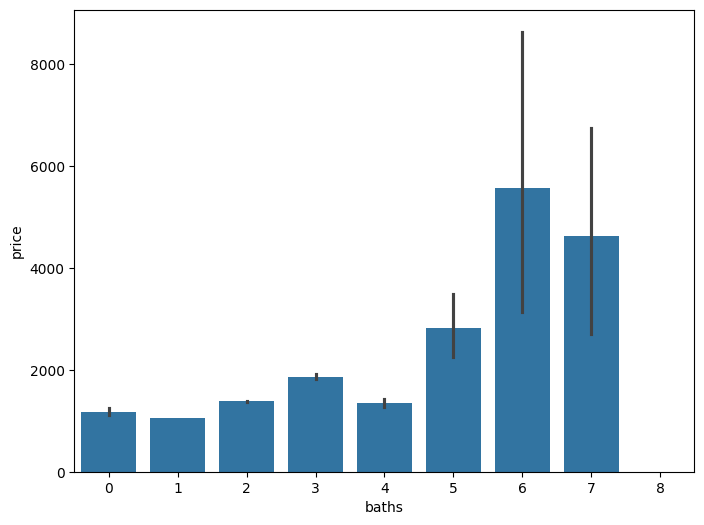

In [ ]:
# Cria um gráfico de barras mostrando a relação entre o número de banheiros e o preço dos imóveis.
plt.figure(figsize=(8, 6))
sns.barplot(data=df[(df['baths'] < 9) & (df['price'] < 100000)], y='price', x='baths')
plt.show()

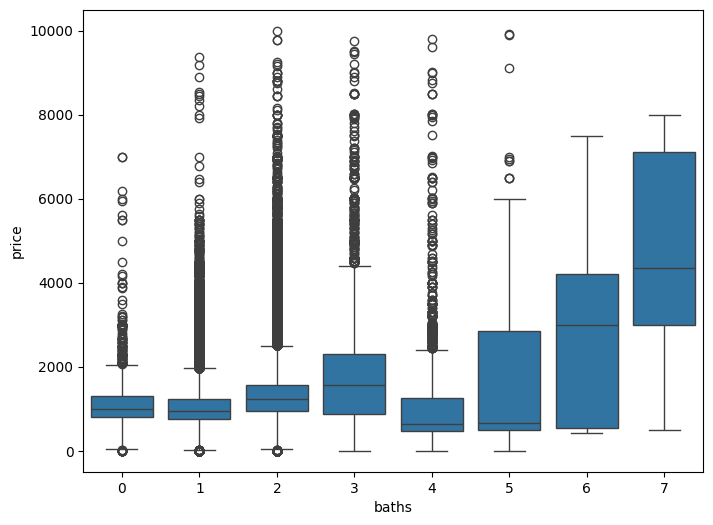

In [ ]:
# Cria um gráfico de caixa (boxplot) para mostrar a variação de preço por número de banheiros,
# para imóveis com menos de 8 banheiros e preço inferior a 10000.
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[(df['baths'] < 8) & (df['price'] < 10000)], y='price', x='baths')
plt.show()

## **Label Encoding**

In [ ]:
# Importa a classe LabelEncoder para converter colunas categóricas em numéricas.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# # Exibe a contagem de cada opção de estacionamento disponível.
df['parking_options'].value_counts()

,count
parking_options,
off-street parking,128502
attached garage,40591
carport,38955
detached garage,16940
street parking,15951
no parking,3188
valet parking,163


In [ ]:
# Exibe a contagem de cada opção de lavanderia disponível.
df['laundry_options'].value_counts()

,count
laundry_options,
w/d in unit,131783
w/d hookups,75568
laundry on site,58873
laundry in bldg,36103
no laundry on site,3624


In [ ]:
df['type'].value_counts()

,count
type,
apartment,318032
house,33266
townhouse,15885
condo,6238
duplex,5047
manufactured,4242
cottage/cabin,861
loft,693
flat,531


In [ ]:
# Converte as colunas categóricas 'state', 'region', 'parking_options', e 'laundry_options' para numéricas.
df['state_number'] = label_encoder.fit_transform(df['state'])
df['region_number'] = label_encoder.fit_transform(df['region'])
df['parking_options_number'] = label_encoder.fit_transform(df['parking_options'])
df['laundry_options_number'] = label_encoder.fit_transform(df['laundry_options'])
df['type_number'] = label_encoder.fit_transform(df['type'])

Aqui, ao invés de converter diretamente as colunas, foram criadas novas para receber os valores. Dessa forma, não será preciso executar a célula do DataFrame original sempre que uma mudança for necessária.

## **Regressão**

In [ ]:
# Importa bibliotecas adicionais para modelagem e avaliação.
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
# Seleciona as colunas que serão usadas para o treinamento do modelo.
df_train = df[['price', 'type_number', 'sqfeet', 'lat', 'long', 'laundry_options_number', 'parking_options_number', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'state_number']]

In [ ]:
# Filtra os dados para excluir outliers, removendo imóveis com mais de 8 banheiros,
# mais de 9 camas ou com preço superior a 10000.
df_train = df_train[(df_train['baths'] < 8) & (df_train['beds'] < 9) & (df_train['price'] <= 10000)]

In [ ]:
# Remove linhas com valores nulos.
df_train.dropna(inplace=True)

In [ ]:
# Separa os dados em variáveis independentes (X) e a variável dependente (y - preço).
X = df_train.drop(['price'], axis=1)
y = df_train['price']

# Divide os dados em conjunto de treinamento (70%) e de teste (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Cria e treina o modelo de regressão Gradient Boosting.
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)

# Faz previsões no conjunto de teste.
y_pred = model.predict(X_test)

# Avalia o modelo calculando o erro quadrático médio (MSE), coeficiente de determinação (R²) e a Importância das Features.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
feature_importances = model.feature_importances_

print("\nResultados:")
print(f'MSE: {mse}')
print(f'R2: {r2}')

# Resultados
results = pd.DataFrame({
    'Features': feature_importances,
}, index=X.columns)

print(results)


Resultados:
MSE: 98520.0535806738
R2: 0.7199632605745705
                         Features
type_number              0.014213
sqfeet                   0.181116
lat                      0.159465
long                     0.391528
laundry_options_number   0.060709
parking_options_number   0.042068
beds                     0.010526
baths                    0.044025
cats_allowed             0.001026
dogs_allowed             0.000900
smoking_allowed          0.006677
wheelchair_access        0.002807
electric_vehicle_charge  0.004968
comes_furnished          0.005654
state_number             0.074316


As variaveis que mais influenciaram no resultado final foram a longitude, a latitude e a metragem. A conclusão que podemos chegar é que a região do imóvel é o que mais influencia no preço do aluguel. Imovéis que estão localizados nos Estados mais caros dos EUA tendem a ter o preço do aluguel mais elevando em comparação com outras regiões.

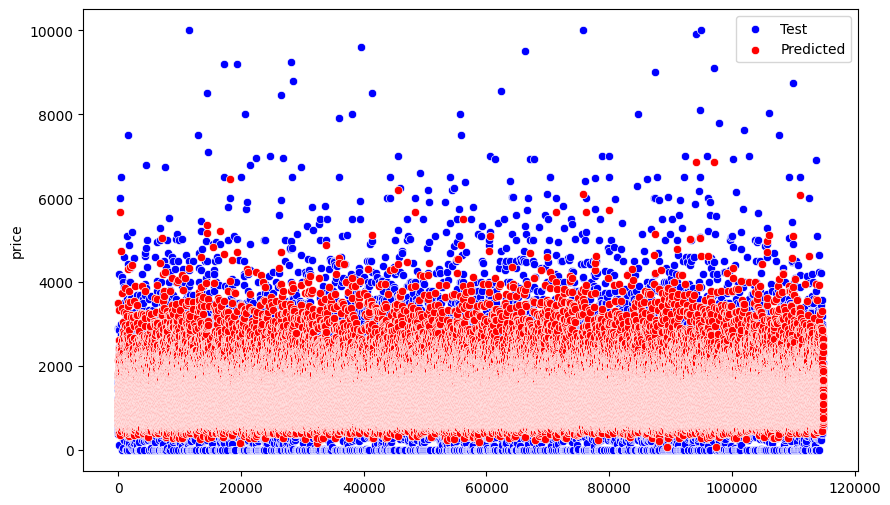

In [ ]:
# Cria um gráfico comparando os valores reais e previstos de preço no conjunto de teste.
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test, color='blue' ,label='Test')
sns.scatterplot(x=x_axis, y=y_pred, color='red', label='Predicted')
plt.legend()
plt.show()

Por fim, foi gerado um gráfico de dispersão para comparar a diferença dos entre os valores previstos e os valores de teste.